# Exploring the Dungeons and Dragons Monster Manual Data

# Table of Contents

* [Introduction](#Introduction)

    * [What is Dungeons and Dragons?](#DND_Overview)
    * [Problem Statement](#Problem_Statement)
    * [Approach](#Approach)
    
* [Overview of Dataset](#Overview_of_Data)
    * [Loading Data from Kaggle](#kaggle)

* [Exploratory Data Analysis - Cleaning / Feature Engineering](#Feature)
    * [Name](#Name)
    * [Challenge Rating](#CR)
    * [Race + Alignment](#Race_Alignment)
    * [Armor](#Armor)
    * [HP](#HP)
    * [Size](#Size)
    * [Speed](#Speed)
    
* [Modeling Challenge Rating](#model)
    * [Pearson Correlation Coefficient](#pearson)
    * [Predicting Challenge Rating with Multivariate Linear Regression Model](#model_MLR)
    * [Evaluating a Model](#models)
    * [Plotting a Regression Line](#reg_plot)
    * [Improving the Model](#models2)
    * [Predicting New Monsters](#predict)
    * [Reduce Number of Races](#reduce_race)
    * [Remove Alignment](#reduce_align)
    * [Scoring Various Models](#score)

* [Conclusions](#conclusion)
    
* [Next Steps](#next)

* [Plotting the Interesting Relationships](#plot)
    * [Plotting the Interesting Relationships continued](#plot2)
    
* Contact Info

<a class="anchor" id="Introduction"></a>
# Introduction 


<a class="anchor" id="DND_Overview"></a>

## What is Dungeons and Dragons?

Table top role playing game in which players collobaratively use their imagination, dice, and a set of guidelines to explore fantastical worlds. The game has been around since 1974 and most sources accredit the creation of the game to a man named Gary Gygax. Over the years, there have been several editions of the game set in the worlds of Greyhawk and Faerûn. Today, the game has millions of players and generates hundreds of millions in revenue for the Wizards of the Coast company which publishes books and other gaming materials. 


<a class="anchor" id="Problem_Statement"></a>

## Problem Statement

It doesn't make sense to call your gane Dungeons and Dragons, if you're not going to explore dungeons and slay dragons. Wizards of the Coast publishes a rulebook for exploring dungeons called the Player's Handbook and a beastiary of various monsters known as the Monster Manual. These books give players the resources to know how strong is their hero and how powerful are the monsters. The collective power is the monster is defined as the monster's Challenge Rating. 

However, people like to create their own monsters or modify the monsters in the Monster Manual. For this new monster, the players will not have perfect knowledge the monster's Challenge Rating. If the monster is inadvertently made too powerful, the players' characters would die, and an otherwise fun evening would be ruined.When building new monsters, players manipulate other monster attributes such as the amount of health, armor, speed, type, and size of the monster. 

To make sure the players can slay their dragons, can we build a prediction model that tells the players the Challenge Rating of their newly created monster by analyzing the other attributes?

<a class="anchor" id="Approach"></a>

## Approach

The website Kaggle.com is a popular website for sharing data science projects and datasets. I will start with a dataset of monsters from the Monster Manual that someone else has produced. I will explore the dataset cleaning existing features and engineer new features. Once the data is in a workable format, I will build a prediction model. I will evaluate the model and attempt to improve the model's performance. Finally, I will produce some graphics that will help to explain the information in the dataset.


<a class="anchor" id="Overview_of_Data"></a>

# Overview of Dataset

<a class="anchor" id="kaggle"></a>
## Loading Monster Manual Data from Kaggle

From Kaggle
https://www.kaggle.com/patrickgomes/dungeons-and-dragons-5e-monsters

Right away, it is easy to see that this dataset will need some work. The original load is all stored as strings. These will need to be converted to categorical and numeric datatypes in order to use in the model. 

In [1]:
# Import Libraries used in this project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [3]:
# Loads the data from the Kaggle csv file into a dataframe in memory
data = pd.read_csv('Dd5e_monsters.csv')

In [4]:
# Makes a new variable, df, and keeps a copy of the original data
df = data.copy()

In [5]:
# Updates some settings to display all the data in our df
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [6]:
# View the data
df

,Name,Size,Race + alignment,HP,Armor,Speed,Challenge rating (XP)
0,Aboleth,Large,"aberration, Lawful Evil",135 (18d10+36),17 (Natural Armor),"10 ft., swim 40 ft.","10 (5,900 XP)"
1,Acolyte,Medium,"humanoid (any race), Any Alignment",9 (2d8),10,30 ft.,1/4 (50 XP)
2,Adult Black Dragon,Huge,"dragon, Chaotic Evil",195 (17d12+85),19 (Natural Armor),"40 ft., fly 80 ft., swim 40 ft.","14 (11,500 XP)"
3,Adult Blue Dragon,Huge,"dragon, Lawful Evil",225 (18d12+108),19,"40 ft., burrow 30 ft., fly 80 ft.","16 (15,000 XP)"
4,Adult Brass Dragon,Huge,"dragon, Chaotic Good",172 (15d12+75),18 (Natural Armor),"40 ft., burrow 40 ft., fly 80 ft.","13 (10,000 XP)"
5,Adult Bronze Dragon,Huge,"dragon, Lawful Good",212 (17d12+102),19 (Natural Armor),"40 ft., fly 80 ft., swim 40 ft.","15 (13,000 XP)"
6,Adult Copper Dragon,Huge,"dragon, Chaotic Good",184 (16d12+80),18 (Natural Armor),"40 ft., climb 40 ft., fly 80 ft.","14 (11,500 XP)"
7,Adult Gold Dragon,Huge,"dragon, Lawful Good",256 (19d12+133),19 (Natural Armor),"40 ft., fly 80 ft., swim 40 ft.","17 (18,000 XP)"
8,Adult Green Dragon,Huge,"dragon, Lawful Evil",207 (18d12+90),19 (Natural Armor),"40 ft., fly 80 ft., swim 40 ft.","15 (13,000 XP)"
9,Adult Red Dragon,Huge,"dragon, Chaotic Evil",256 (19d12+133),19 (Natural Armor),"40 ft., climb 40 ft., fly 80 ft.","17 (18,000 XP)"


<a class="anchor" id="Feature"></a>

## Exploratory Data Analysis - Cleaning / Feature Engineering

In [7]:
# Initial thoughts:

# The monster Name is a unique identifier thus it can index for our dataframe

# Challenge Rating is the value that I will try to predict
# Split Challenge rating (XP) into two columns
#     May want to eliminate XP if Challenge Rating maps to an XP value

# Need to split Race + alignment at the first comma in to two features

# Need to convert Armor to a numeric data type

# Convert HP into just the average, numeric HP value 
#     Values in parentheses represent an HP range for a creature determined by rolling dice

# Need to split the Speed field into Speed, Swim Speed, Flying Speed 
#     and convert to numeric data types

## Name Feature Cleaning

In [8]:
# Now that we have looked through all the data, lets set the view settings back to defaults
pd.reset_option('display.max_rows')

In [9]:
# All of our data is currently as strings which are Python objects
df.dtypes

Name                      object
Size                      object
Race + alignment          object
HP                        object
Armor                     object
Speed                     object
Challenge rating  (XP)    object
dtype: object

In [10]:
# Removes any white space from the imported string
df["Name"] = df["Name"].str.strip()

In [11]:
# Indexes by the Name of the Monsters
df = df.set_index("Name")
df

,Size,Race + alignment,HP,Armor,Speed,Challenge rating (XP)
Name,,,,,,
Aboleth,Large,"aberration, Lawful Evil",135 (18d10+36),17 (Natural Armor),"10 ft., swim 40 ft.","10 (5,900 XP)"
Acolyte,Medium,"humanoid (any race), Any Alignment",9 (2d8),10,30 ft.,1/4 (50 XP)
Adult Black Dragon,Huge,"dragon, Chaotic Evil",195 (17d12+85),19 (Natural Armor),"40 ft., fly 80 ft., swim 40 ft.","14 (11,500 XP)"
Adult Blue Dragon,Huge,"dragon, Lawful Evil",225 (18d12+108),19,"40 ft., burrow 30 ft., fly 80 ft.","16 (15,000 XP)"
Adult Brass Dragon,Huge,"dragon, Chaotic Good",172 (15d12+75),18 (Natural Armor),"40 ft., burrow 40 ft., fly 80 ft.","13 (10,000 XP)"
...,...,...,...,...,...,...
Young Green Dragon,Large,"dragon, Lawful Evil",136 (16d10+48),18 (Natural Armor),"40 ft., fly 80 ft., swim 40 ft.","8 (3,900 XP)"
Young Red Dragon,Large,"dragon, Chaotic Evil",178 (17d10+85),18 (Natural Armor),"40 ft., climb 40 ft., fly 80 ft.","10 (5,900 XP)"
Young Silver Dragon,Large,"dragon, Lawful Good",168 (16d10+80),18 (Natural Armor),"40 ft., fly 80 ft.","9 (5,000 XP)"


<a class="anchor" id="CR"></a>

## Challenge rating (XP) Feature Cleaning 


In [12]:
# Let's take a look

# DND awards players who defeat a monster with Experience Points (XP) 
# Monsters with higher Challenge Ratings award more XP

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# There is a lot of white space in this column name and the values
df["Challenge rating  (XP)"]

Name
Aboleth                        10 (5,900 XP)
Acolyte                          1/4 (50 XP)
Adult Black Dragon            14 (11,500 XP)
Adult Blue Dragon             16 (15,000 XP)
Adult Brass Dragon            13 (10,000 XP)
Adult Bronze Dragon           15 (13,000 XP)
Adult Copper Dragon           14 (11,500 XP)
Adult Gold Dragon             17 (18,000 XP)
Adult Green Dragon            15 (13,000 XP)
Adult Red Dragon              17 (18,000 XP)
Adult Silver Dragon           16 (15,000 XP)
Adult White Dragon            13 (10,000 XP)
Air Elemental                   5 (1,800 XP)
Ancient Black Dragon          21 (33,000 XP)
Ancient Blue Dragon           23 (50,000 XP)
Ancient Brass Dragon          20 (25,000 XP)
Ancient Bronze Dragon         22 (41,000 XP)
Ancient Copper Dragon         21 (33,000 XP)
Ancient Gold Dragon           24 (62,000 XP)
Ancient Green Dragon          22 (41,000 XP)
Ancient Red Dragon            24 (62,000 XP)
Ancient Silver Dragon         23 (50,000 XP)
Ancie

In [13]:
# Let's go ahead and remove the white space

df["Challenge rating  (XP)"] = df["Challenge rating  (XP)"].str.strip()

In [14]:
# Since viewing the unique values of a feature will be a recurring need through this exploration, 
# we can use this helper function to loop through and print the unique values in an easy to view format

def print_unique(col):
    for u in sorted(col.unique()):
        print(u)

In [15]:
# Initially, it appears as though there is a 1:1 relationship between the mapping of Challenge Rating and XP

# Challenge Rating grows linearly and XP grows at a faster rate

# For this exploration, I will just extract the Challenge Rating

print_unique(df["Challenge rating  (XP)"])

0 (10 XP)
1 (200 XP)
1/2 (100 XP)
1/4 (50 XP)
1/8 (25 XP)
10 (5,900 XP)
11 (7,200 XP)
12 (8,400 XP)
13 (10,000 XP)
14 (11,500 XP)
15 (13,000 XP)
16 (15,000 XP)
17 (18,000 XP)
19 (22,000 XP)
2 (450 XP)
20 (25,000 XP)
21 (33,000 XP)
22 (41,000 XP)
23 (50,000 XP)
24 (62,000 XP)
3 (700 XP)
30 (155,000 XP)
4 (1,100 XP)
5 (1,800 XP)
6 (2,300 XP)
7 (2,900 XP)
8 (3,900 XP)
9 (5,000 XP)


In [16]:
pd.reset_option('display.max_rows')

In [17]:
# Rename the column
df.rename(columns = {"Challenge rating  (XP)": "Challenge Rating"}, inplace = True)
df.columns

Index(['Size', 'Race + alignment', 'HP', 'Armor', 'Speed', 'Challenge Rating'], dtype='object')

In [18]:
# Extracts the Challenge Rating
x = df["Challenge Rating"].str.split(" ", 1, expand=True)

In [19]:
# The fractions 1/2, 1/4, 1/8 need to be converted to a float
df["Challenge Rating"] = x[0].apply(lambda x: eval(x))

In [20]:
# View the new values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df["Challenge Rating"]

Name
Aboleth                      10.000
Acolyte                       0.250
Adult Black Dragon           14.000
Adult Blue Dragon            16.000
Adult Brass Dragon           13.000
Adult Bronze Dragon          15.000
Adult Copper Dragon          14.000
Adult Gold Dragon            17.000
Adult Green Dragon           15.000
Adult Red Dragon             17.000
Adult Silver Dragon          16.000
Adult White Dragon           13.000
Air Elemental                 5.000
Ancient Black Dragon         21.000
Ancient Blue Dragon          23.000
Ancient Brass Dragon         20.000
Ancient Bronze Dragon        22.000
Ancient Copper Dragon        21.000
Ancient Gold Dragon          24.000
Ancient Green Dragon         22.000
Ancient Red Dragon           24.000
Ancient Silver Dragon        23.000
Ancient White Dragon         20.000
Androsphinx                  17.000
Animated Armor                1.000
Ankheg                        2.000
Ape                           0.500
Archmage               

In [21]:
pd.reset_option('display.max_rows')

In [22]:
# Challenge Ratings range from 0 to 30
print_unique(df["Challenge Rating"])

0.0
0.125
0.25
0.5
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
19.0
20.0
21.0
22.0
23.0
24.0
30.0


<a class="anchor" id="Race_Alignment"></a>

## Race + Alignment Feature Cleaning


In [23]:
# Split the Race + Alignment into two columns
df[["Race", "Alignment"]] = df["Race + alignment"].str.split(",", 1, expand=True)
df.columns

Index(['Size', 'Race + alignment', 'HP', 'Armor', 'Speed', 'Challenge Rating',
       'Race', 'Alignment'],
      dtype='object')

In [24]:
# Drops the old column
df.drop("Race + alignment", axis=1, inplace=True)
df.columns

Index(['Size', 'HP', 'Armor', 'Speed', 'Challenge Rating', 'Race',
       'Alignment'],
      dtype='object')

In [25]:
# For consistency, I want the values in the Race column to have a capitalized first letter
# Will check for unique values then format to proper case
print_unique(df["Race"])

Fiend (Shapechanger)
aberration
beast
celestial
construct
dragon
elemental
fey
fiend
fiend (demon)
fiend (devil
fiend (devil)
fiend (shapechanger)
giant
humanoid (any race)
humanoid (dwarf)
humanoid (elf)
humanoid (gnoll)
humanoid (gnome)
humanoid (goblinoid)
humanoid (grimlock)
humanoid (human
humanoid (human)
humanoid (kobold)
humanoid (lizardfolk)
humanoid (merfolk)
humanoid (orc)
humanoid (sahuagin)
monstrosity
monstrosity (shapechanger)
monstrosity (titan)
ooze
plant
swarm of tiny beasts
undead
undead (shapechanger)


In [26]:
# Interestingly there seems to be some subclassifications for several types of Races:
# Fiend/fiend undead humanoid shapechanger

# This feature seems like a candidate to have the dimensions reduced before making dummy variables 

# There is also a type-O for fiend (devil)/(devil and humanoid (human)/(human

# For now, I will correct the type-Os and capitalization

In [27]:
# There are not many observations of the subtypes
df["Race"].value_counts()

beast                         87
dragon                        43
monstrosity                   35
humanoid (any race)           21
undead                        17
elemental                     16
giant                         10
swarm of tiny beasts          10
fiend (devil)                  9
construct                      9
fiend (demon)                  8
fey                            6
plant                          6
celestial                      6
aberration                     5
humanoid (human                5
ooze                           4
fiend                          4
humanoid (goblinoid)           3
Fiend (Shapechanger)           2
monstrosity (shapechanger)     2
monstrosity (titan)            2
fiend (devil                   1
humanoid (gnoll)               1
undead (shapechanger)          1
humanoid (human)               1
humanoid (grimlock)            1
humanoid (dwarf)               1
humanoid (merfolk)             1
humanoid (lizardfolk)          1
humanoid (

In [28]:
# Check only the observations with typos
df[df['Race'].isin(['fiend (devil', 'fiend (devil)'])]['Race']

Name
Barbed Devil     fiend (devil)
Bearded Devil    fiend (devil)
Bone Devil       fiend (devil)
Chain Devil      fiend (devil)
Erinyes          fiend (devil)
Horned Devil     fiend (devil)
Ice Devil        fiend (devil)
Imp               fiend (devil
Lemure           fiend (devil)
Pit Fiend        fiend (devil)
Name: Race, dtype: object

In [29]:
# Seems like when the data was loaded in, the "Shapechanger" portion of the Race feature 
# was written to the Alignment Feature for the "Imp" monster
df.loc["Imp"]["Alignment"]

' shapechanger), Lawful Evil'

In [30]:
# This error also occurred in the "Werebear", "WereBoar", "Wererat", "Weretiger", and "Werewolf" monsters
df[df['Race'].isin(['humanoid (human', 'humanoid (human)'])]

,Size,HP,Armor,Speed,Challenge Rating,Race,Alignment
Name,,,,,,,
Half-Red Dragon Veteran,Medium,65 (10d8+20),18 (plate),30 ft.,5.0,humanoid (human),Any
Werebear,Medium,135 (18d8+54),"10 (In Humanoid Form, 11 In Bear And Hybrid Forms )","30 ft. (40 ft., climb 30 ft. in bear or hybrid form)",5.0,humanoid (human,"shapechanger), Neutral Good"
Wereboar,Medium,78 (12d8+24),"10 (In Humanoid Form, 11 In Boar And Hybrid Forms )",30 ft. (40 ft. in boar form),4.0,humanoid (human,"shapechanger), Neutral Evil"
Wererat,Medium,33 (6d8+6),12,30 ft.,2.0,humanoid (human,"shapechanger), Lawful Evil"
Weretiger,Medium,120 (16d8+48),12,30 ft. (40 ft. in tiger form),4.0,humanoid (human,"shapechanger), Neutral"
Werewolf,Medium,58 (9d8+18),"11 (In Humanoid Form, 12 In Wolf Or Hybrid Form)",30 ft. (40 ft. in wolf form),3.0,humanoid (human,"shapechanger), Chaotic Evil"


In [31]:
# Since there are only a few errors, I will manually update each field
df.loc["Imp", ["Alignment"]] = "Lawful Evil"
df.loc["Imp", ["Race"]] = "fiend (devil shapechanger)"

df.loc["Werebear", ["Race"]] = "humanoid (human shapechanger)"
df.loc["Werebear", ["Alignment"]] = "Neutral Good"

df.loc["Wereboar", ["Race"]] = "humanoid (human shapechanger)"
df.loc["Wereboar", ["Alignment"]] = "Neutral Evil"

df.loc["Wererat", ["Race"]] = "humanoid (human shapechanger)"
df.loc["Wererat", ["Alignment"]] = "Lawful Evil"

df.loc["Weretiger", ["Race"]] = "humanoid (human shapechanger)"
df.loc["Weretiger", ["Alignment"]] = "Neutral"

df.loc["Werewolf", ["Race"]] = "humanoid (human shapechanger)"
df.loc["Werewolf", ["Alignment"]] = "Chaotic Evil"


In [32]:
# Check that the update was successful
print(df.loc["Imp", ["Race", "Alignment"]])
print()

print(df.loc["Werebear", ["Race", "Alignment"]])
print()

print(df.loc["Wereboar", ["Race", "Alignment"]])
print()

print(df.loc["Wererat", ["Race", "Alignment"]])
print()

print(df.loc["Weretiger", ["Race", "Alignment"]]) 
print()

print(df.loc["Werewolf", ["Race", "Alignment"]])

Race         fiend (devil shapechanger)
Alignment                   Lawful Evil
Name: Imp, dtype: object

Race         humanoid (human shapechanger)
Alignment                     Neutral Good
Name: Werebear, dtype: object

Race         humanoid (human shapechanger)
Alignment                     Neutral Evil
Name: Wereboar, dtype: object

Race         humanoid (human shapechanger)
Alignment                      Lawful Evil
Name: Wererat, dtype: object

Race         humanoid (human shapechanger)
Alignment                          Neutral
Name: Weretiger, dtype: object

Race         humanoid (human shapechanger)
Alignment                     Chaotic Evil
Name: Werewolf, dtype: object


In [33]:
# Verify that the changes were passed to our dataframe 
for unique_race in sorted(df["Race"].unique()):
    print(unique_race)

print()

for unique_alignment in sorted(df["Alignment"].unique()):
    print(unique_alignment)

Fiend (Shapechanger)
aberration
beast
celestial
construct
dragon
elemental
fey
fiend
fiend (demon)
fiend (devil shapechanger)
fiend (devil)
fiend (shapechanger)
giant
humanoid (any race)
humanoid (dwarf)
humanoid (elf)
humanoid (gnoll)
humanoid (gnome)
humanoid (goblinoid)
humanoid (grimlock)
humanoid (human shapechanger)
humanoid (human)
humanoid (kobold)
humanoid (lizardfolk)
humanoid (merfolk)
humanoid (orc)
humanoid (sahuagin)
monstrosity
monstrosity (shapechanger)
monstrosity (titan)
ooze
plant
swarm of tiny beasts
undead
undead (shapechanger)

 Any
 Any Alignment
 Any Chaotic Alignment
 Any Evil Alignment
 Any Non-good Alignment
 Any Non-lawful Alignment
 Chaotic Evil
 Chaotic Good
 Chaotic Neutral
 Lawful Evil
 Lawful Good
 Lawful Neutral
 Neutral
 Neutral Evil
 Neutral Good
 Neutral Good (50%) Or Neutral Evil (50%)
 Unaligned
Chaotic Evil
Lawful Evil
Neutral
Neutral Evil
Neutral Good


In [34]:
# Looking at the values for "Alignment", there are some leading white spaces. Let's remove them
df["Alignment"] = df["Alignment"].str.strip()

print(df["Alignment"].value_counts().sort_index())

Any                                           1
Any Alignment                                15
Any Chaotic Alignment                         1
Any Evil Alignment                            1
Any Non-good Alignment                        4
Any Non-lawful Alignment                      2
Chaotic Evil                                 44
Chaotic Good                                 12
Chaotic Neutral                               3
Lawful Evil                                  37
Lawful Good                                  19
Lawful Neutral                                3
Neutral                                      19
Neutral Evil                                 28
Neutral Good                                  6
Neutral Good (50%) Or Neutral Evil (50%)      1
Unaligned                                   128
Name: Alignment, dtype: int64


In [35]:
# Finally, time to convert the feature names to propercase
df["Race"] = df["Race"].str.title()
df["Alignment"] = df["Alignment"].str.title()

# Now that the "Race" feature is cleaned up, let's view a frequency table of each value
print(df["Race"].value_counts().sort_index())
print()
print(df["Alignment"].value_counts().sort_index())


Aberration                        5
Beast                            87
Celestial                         6
Construct                         9
Dragon                           43
Elemental                        16
Fey                               6
Fiend                             4
Fiend (Demon)                     8
Fiend (Devil Shapechanger)        1
Fiend (Devil)                     9
Fiend (Shapechanger)              3
Giant                            10
Humanoid (Any Race)              21
Humanoid (Dwarf)                  1
Humanoid (Elf)                    1
Humanoid (Gnoll)                  1
Humanoid (Gnome)                  1
Humanoid (Goblinoid)              3
Humanoid (Grimlock)               1
Humanoid (Human Shapechanger)     5
Humanoid (Human)                  1
Humanoid (Kobold)                 1
Humanoid (Lizardfolk)             1
Humanoid (Merfolk)                1
Humanoid (Orc)                    1
Humanoid (Sahuagin)               1
Monstrosity                 

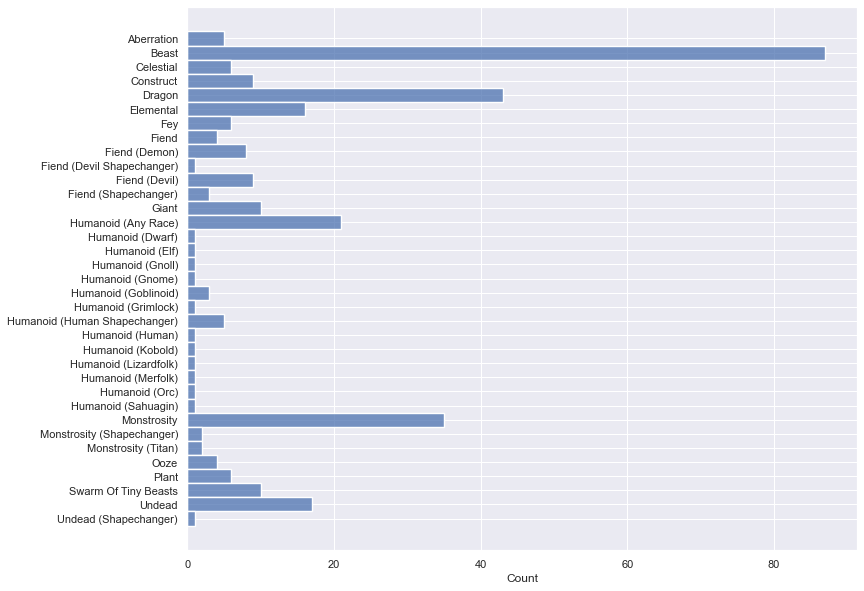

In [36]:
# Let's view a histogram of the count of each Race

# There are a lot of variables, so we will need to adjust the plotting display defaults
sns.set(rc={"figure.figsize":(12, 10)}) #width=10, height=10

# We can see most of the monsters are Beasts
sns.histplot(y= sorted(df["Race"]));

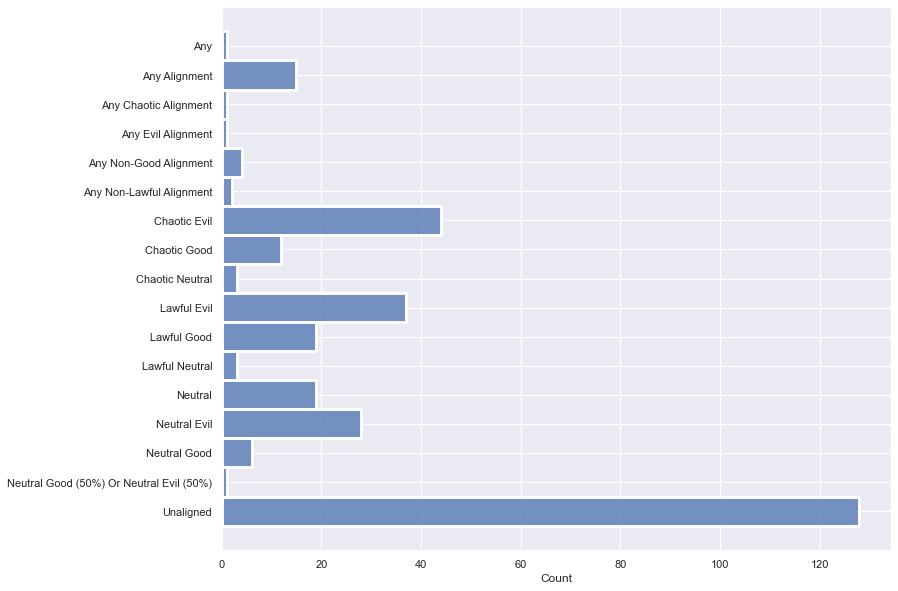

In [37]:
# Let's view a histogram of the count of each Alignment
# Most monsters are Unaligned

sns.histplot(y= sorted(df["Alignment"]));

<a class="anchor" id="Armor"></a>

## Armor Feature Cleaning

In [38]:
# Let's view the values of the Armor Feature
print_unique(df["Armor"])

10
10 (In Humanoid Form, 11 In Bear And Hybrid Forms )
10 (In Humanoid Form, 11 In Boar And Hybrid Forms )
11
11 (16 With Barkskin)
11 (Hide Armor)
11 (In Humanoid Form, 12 In Wolf Or Hybrid Form)
11 (Leather Armor)
11 (Natural Armor)
12
12 (15 With Mage Armor)
12 (Hide Armor)
12 (Leather Armor)
12 (Natural Armor)
13
13 (Armor Scraps)
13 (Barding Scraps)
13 (Chain Shirt)
13 (Hide Armor)
13 (Leather Armor)
13 (Natural Armor)
14
14 (Leather Armor)
14 (Natural Armor)
14 (Natural Armor, 11 While Prone)
14 (Studded Leather)
15
15 (Breastplate)
15 (Chain Shirt)
15 (Hide Armor, Shield)
15 (Leather Armor)
15 (Leather Armor, Shield)
15 (Natural Armor)
15 (Natural Armor, Shield)
15 (Patchwork Armor)
15 (Studded Leather)
15 (chain shirt)
16 (Chain Mail)
16 (Chain Shirt, Shield)
16 (Hide Armor, Shield)
16 (Natural Armor)
16 (Scale Mail)
16 (Scale Mail, Shield)
16 (Studded Leather, Shield)
17 (Natural Armor)
17 (Natural Armor, Shield)
17 (Splint)
18 (Chain Mail, Shield)
18 (Natural Armor)
18 (Plate

In [39]:
# With these values, it appears some monsters can change their armor rating
# Also, some monsters have a descriptive "Armor Type" such as "Plate" or "Leather Armor"

# For this exploration, I will just extract the numerical value
x = df["Armor"].str.strip()
x = x.str.split(" ", 1, expand=True)

# Updates the data frame with the numerical data
df["Armor"] = x[0]
df["Armor"].head()

Name
Aboleth               17
Acolyte               10
Adult Black Dragon    19
Adult Blue Dragon     19
Adult Brass Dragon    18
Name: Armor, dtype: object

In [40]:
# Noticing that the data type is object but should be a numeric, we will need to convert to int
df["Armor"] = df["Armor"].astype(int)
df["Armor"].head()

Name
Aboleth               17
Acolyte               10
Adult Black Dragon    19
Adult Blue Dragon     19
Adult Brass Dragon    18
Name: Armor, dtype: int32

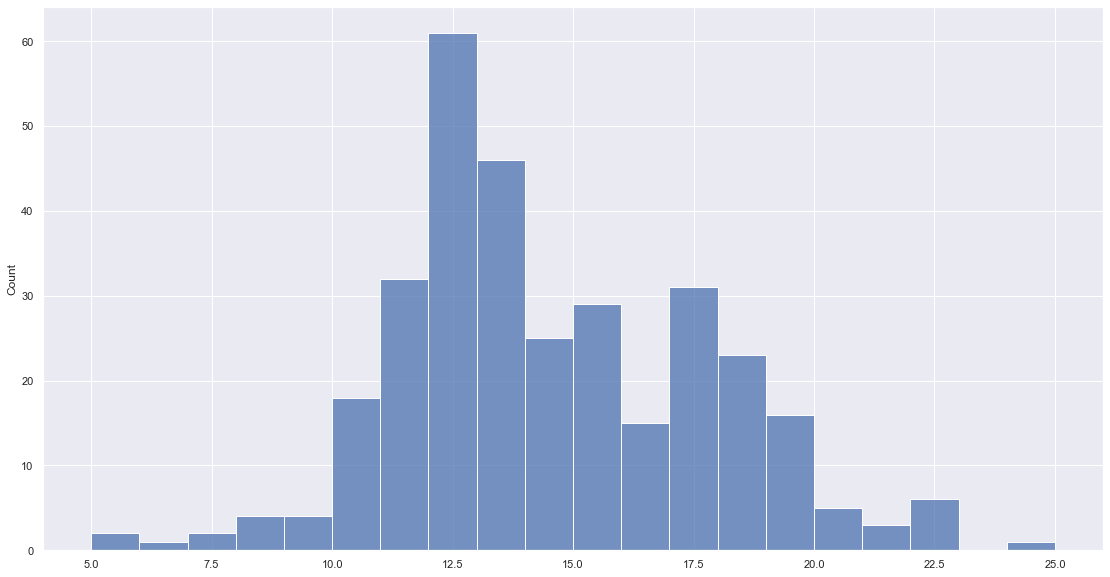

In [41]:
# Plots the frequencies of each armor value. Added more bins than the default
# Most monsters have an armor value about 11-13

sns.set(rc={"figure.figsize":(19, 10)}) #width=19, height=10
sns.histplot(x= sorted(df["Armor"]), binwidth=1);

<a class="anchor" id="Size"></a>
## Size Feature Cleaning 

In [42]:
# Lets take a look at the "Size" feature
print_unique(df["Size"])

Gargantuan
Huge
Large
Medium
Small
Tiny


In [43]:
# Everything looks good to the eye. Lets strip the values just to make sure there isn't whitespace
df["Size"] = df["Size"].str.strip()

print_unique(df["Size"])

Gargantuan
Huge
Large
Medium
Small
Tiny


In [44]:
# We should convert this feature in pd.categorical
# These are ordinal values and Pandas can account for this property in many models

df["Size"] = pd.Categorical(df["Size"] , ordered=True, categories=["Tiny","Small","Medium","Large","Huge","Gargantuan"])

df["Size"].head()

Name
Aboleth                Large
Acolyte               Medium
Adult Black Dragon      Huge
Adult Blue Dragon       Huge
Adult Brass Dragon      Huge
Name: Size, dtype: category
Categories (6, object): ['Tiny' < 'Small' < 'Medium' < 'Large' < 'Huge' < 'Gargantuan']

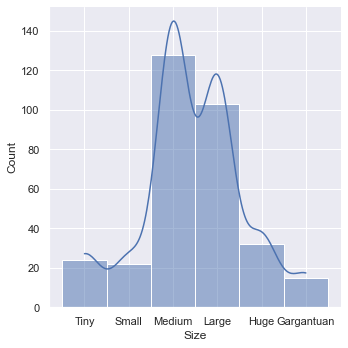

In [45]:
# We can take a look at the distribution of sizes
# Medium and Large monsters account for the majority of monsters

sns.displot ( x=df["Size"], kde = True);

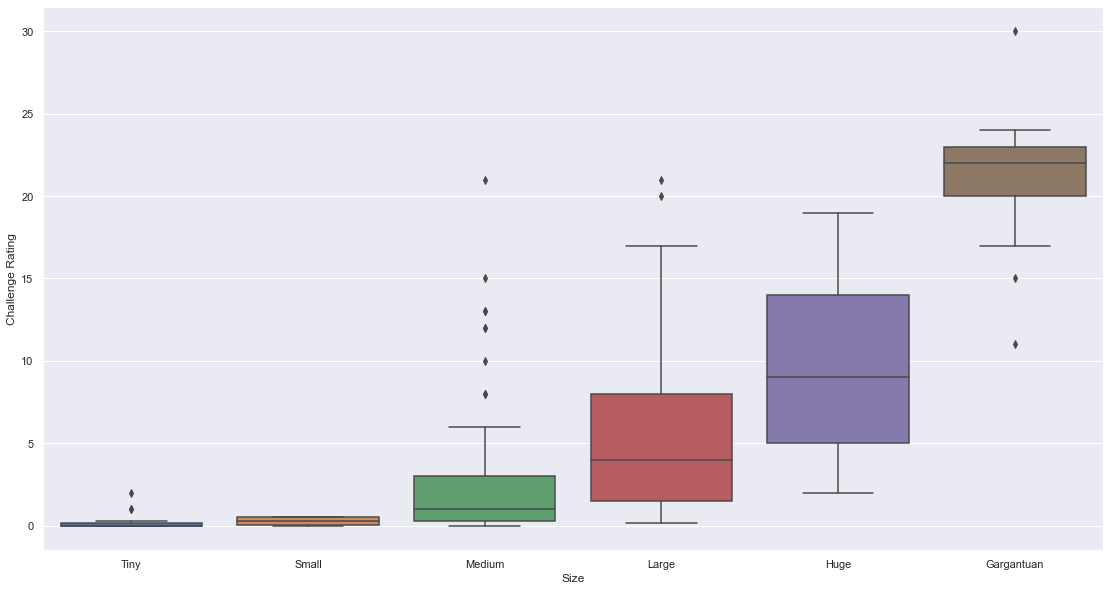

In [46]:
# Now that we have a few features cleaned up, we can start to plot more interesting charts
# Let's see if Size and Challenge Rating are correlated
# Bigger monsters are generally more challenging
sns.boxplot(x=df["Size"], y=df["Challenge Rating"]);

[To see more plots jump to the end](#plot) 

<a class="anchor" id="HP"></a>

## HP Feature Cleaning 

In [47]:
#Let's take a look

# DND lists HP values as a function of an average of dice rolls + a constant
# For the Cloud Giant, the HP is listed as 200 (16d12+96)
# 200 = Expected value of rolling a 12 sided die (d12) 16 times and adding 96
# 200 = 6.5 * 16 + 96

# Technically, any HP value in the range is valid for a monster, 
# but, for modeling, the average number should suffice

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df["HP"]

Name
Aboleth                       135 (18d10+36)
Acolyte                              9 (2d8)
Adult Black Dragon            195 (17d12+85)
Adult Blue Dragon            225 (18d12+108)
Adult Brass Dragon            172 (15d12+75)
Adult Bronze Dragon          212 (17d12+102)
Adult Copper Dragon           184 (16d12+80)
Adult Gold Dragon            256 (19d12+133)
Adult Green Dragon            207 (18d12+90)
Adult Red Dragon             256 (19d12+133)
Adult Silver Dragon          243 (18d12+126)
Adult White Dragon            200 (16d12+96)
Air Elemental                  90 (12d10+24)
Ancient Black Dragon         367 (21d20+147)
Ancient Blue Dragon          481 (26d20+208)
Ancient Brass Dragon         297 (17d20+119)
Ancient Bronze Dragon        444 (24d20+192)
Ancient Copper Dragon        350 (20d20+140)
Ancient Gold Dragon          546 (28d20+252)
Ancient Green Dragon         385 (22d20+154)
Ancient Red Dragon           546 (28d20+252)
Ancient Silver Dragon        487 (25d20+225)
Ancie

In [48]:
pd.reset_option('display.max_rows')

In [49]:
# Looks like we need to make a few changes to extract only the first number
# Strip white space
x = df["HP"].str.strip()

#x

In [50]:
# Split at the space after the number
x = x.str.split(" ", 1, expand=True)
#x

In [51]:
# Convert to int
# Assigns the values for the HP column to the first value in our split, the average value
df["HP"] = x[0].astype(int)

#df["HP"]

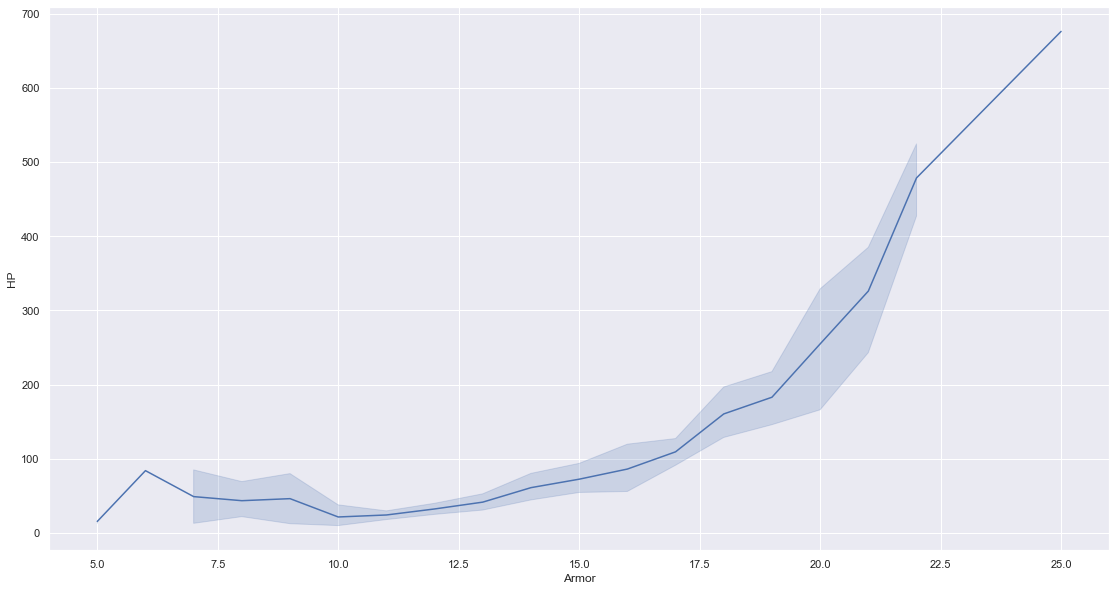

In [52]:
# In this data set, monsters with more armor tend to have more HP as well
sns.lineplot(x="Armor", y="HP", data=df);

<a class="anchor" id="Speed"></a>

##  Speed Feature Cleaning 


In [53]:
# Let's take a look
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df["Speed"]

Name
Aboleth                                                       10 ft., swim 40 ft.
Acolyte                                                                    30 ft.
Adult Black Dragon                                40 ft., fly 80 ft., swim 40 ft.
Adult Blue Dragon                               40 ft., burrow 30 ft., fly 80 ft.
Adult Brass Dragon                              40 ft., burrow 40 ft., fly 80 ft.
Adult Bronze Dragon                               40 ft., fly 80 ft., swim 40 ft.
Adult Copper Dragon                              40 ft., climb 40 ft., fly 80 ft.
Adult Gold Dragon                                 40 ft., fly 80 ft., swim 40 ft.
Adult Green Dragon                                40 ft., fly 80 ft., swim 40 ft.
Adult Red Dragon                                 40 ft., climb 40 ft., fly 80 ft.
Adult Silver Dragon                                            40 ft., fly 80 ft.
Adult White Dragon                 40 ft., burrow 30 ft., fly 80 ft., swim 40 ft.
Air Element

In [54]:
# Upon looking at the data, all monsters have a base/default speed value
# Monsters may have a Burrow, Fly, Swim, Hover, or Climb speed if the monster is adept at moving in such a way

# I will handle this data by extracting the fastest speed as an integer 
# Dummy variables will be created for the optional speeds

In [55]:
# Since we are working with just the Speed subset,
# this work can be done in new dataframe to use fewer resources 
# The final version of df2 will be combined back into df

df2= df.copy()

In [56]:
# Drop the columns not related to the "Speed" feature
df2 = df2.drop(['Size', 'HP', 'Armor', 'Challenge Rating', 'Race', 'Alignment'], axis=1)

In [57]:
# Set all the strings to lower case for consistency and ease of upcoming searches
df2["Speed"] = df2["Speed"].str.lower()

# This code copies the speed string into
df2["Swim"] = df2["Speed"]
df2["Climb"] = df2["Speed"]
df2["Hover"] = df2["Speed"]
df2["Fly"] = df2["Speed"]
df2["Burrow"] = df2["Speed"]

In [58]:
# This code checks whether the keyword is in the string and returns 1 for true and zero for false

df2["Swim"] = [1 if "swim" in value else 0 for value in df2["Swim"]]

df2["Climb"] = [1 if "climb" in value else 0 for value in df2["Climb"]]

df2["Hover"] = [1 if "hover" in value else 0 for value in df2["Hover"]]

df2["Fly"] = [1 if "fly" in value else 0 for value in df2["Fly"]]

df2["Burrow"] = [1 if "burrow" in value else 0 for value in df2["Burrow"]]

In [59]:
# Rename the Speed variable
df2 = df2.rename(columns= {"Speed":"Fastest Speed"})

In [60]:
# Function to split data using spaces into a list substrings then returns the largest value
def largestNumber(in_str):
    in_str_cleaned = in_str.replace("'","")
    l=[int(x) for x in in_str_cleaned.split(" ") if x.isdigit()]

    return max(l) if l else None

#https://stackoverflow.com/questions/21544159/python-finding-largest-integer-in-string#:~:text=Write%20the%20function%20largestNumber%20%28text%29%20that%20takes%20a,%2217%22%29.%20largestNumber%20%28%22One%20person%20ate%20two%20hot%20dogs%21%22%29

In [61]:
# Applies the largestNumber function to each row

df2["Fastest Speed"] = [largestNumber(row) for row in df2["Fastest Speed"] ]

In [62]:
# Drops the original Speed column
df = df.drop(["Speed"], axis=1)

In [63]:
#Joins our new columns into our original dataframe on the index

df = df.join(df2)

In [64]:
df.columns

Index(['Size', 'HP', 'Armor', 'Challenge Rating', 'Race', 'Alignment',
       'Fastest Speed', 'Swim', 'Climb', 'Hover', 'Fly', 'Burrow'],
      dtype='object')

<a class="anchor" id="pearson"></a>
## Pearson Correlation Coefficent

In [65]:
# The Pearson statistic is a normalized measure of the covariance with a range of [-1,1]
# The values tell us both the direction of the relationship and the magnitude of the effect

# We can see that the HP and Armor of the monsters has the strongest effect on the Challenge Rating
# We should see this reflected when we begin modeling
corr = df.corr("pearson")
cr_corr = corr["Challenge Rating"]
cr_corr.sort_values(ascending=False)

Challenge Rating    1.000000
HP                  0.943177
Armor               0.755322
Fastest Speed       0.497492
Fly                 0.324824
Burrow              0.172578
Swim                0.118074
Climb              -0.012000
Hover              -0.030683
Name: Challenge Rating, dtype: float64

<a class="anchor" id="model_MLR"></a>

##  Predicting Challenge Rating with Multivariate Linear Regression Model


In [66]:
# We want our Challenge Rating variable to be our target variable

x = df.copy()

y = x["Challenge Rating"]

x.drop("Challenge Rating", axis=1, inplace=True)

# Run the model without any of the categorical variables
x.drop(['Size', 'Race', 'Alignment'], axis=1, inplace=True)

In [67]:
x.shape, y.shape

((324, 8), (324,))

In [68]:
# Splits data into 80% train 20% test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=1)
#x_train.shape, y_train.shape
#x_test.shape, y_test.shape
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

<a class="anchor" id="models"></a>

## Evaluating a Model

In [69]:
# Once we run our model, we can evaluate the model by checking statistical measures such as MSE or R^2
# We can view the intercept and coefficients of our regression line to see how each feature contributes to the line
model_coef = zip(x.columns, model.coef_)

for _ in model_coef:
    print("Coefficients:", *_)
print()
print("Coefficients:", model.coef_ )
print()
print("Intercept:", model.intercept_)
print()
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print()
print("Coefficient of Determination (R2):", r2_score(y_test, y_pred))

Coefficients: HP 0.04990098944607353
Coefficients: Armor 0.25571324543221885
Coefficients: Fastest Speed 0.0025813905035475884
Coefficients: Swim -0.34156650721921383
Coefficients: Climb -0.3265338354397256
Coefficients: Hover -0.08310134841491125
Coefficients: Fly 0.3141784013893424
Coefficients: Burrow 0.039328598578469896

Coefficients: [ 0.04990099  0.25571325  0.00258139 -0.34156651 -0.32653384 -0.08310135
  0.3141784   0.0393286 ]

Intercept: -3.256620295904307

Mean Squared Error (MSE): 6.0145996699382325

Coefficient of Determination (R2): 0.8425521247480213


<a class="anchor" id="reg_plot"></a>
## Plot a Regression Line

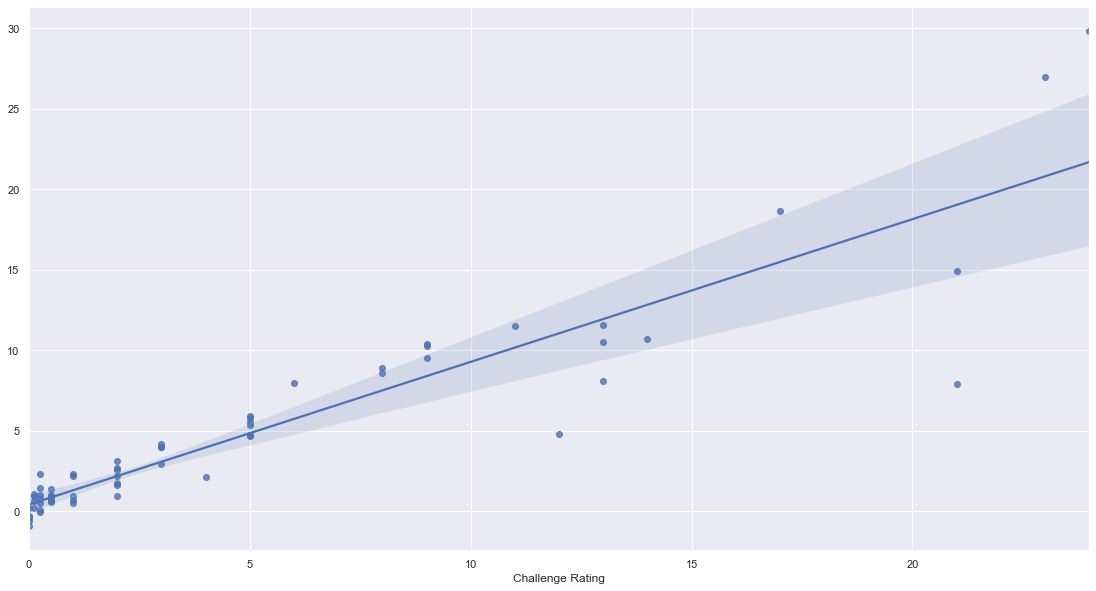

In [70]:
# This shows our line of best fit and a confidence interval for each value from our prediction model
sns.regplot(x=y_test, y= y_pred);

<a class="anchor" id="models2"></a>

## Improving the Model

In [71]:
# See if adding our categorical variables improves model performance

In [72]:
df3 = df.copy()

In [73]:
# To model categorical values with Sklearn, we need to create dummy variables from our categorical variables
df3 = pd.get_dummies(df3, columns=["Size","Race", "Alignment"])

In [74]:
# The Pearson statistic is a normalized measure of the covariance with a range of [-1,1]
# The values tell us both the direction of the relationship and the magnitude of the effect

corr = df3.corr("pearson")
cr_corr = corr["Challenge Rating"]
cr_corr.sort_values(ascending=False)

Challenge Rating                                      1.000000
HP                                                    0.943177
Armor                                                 0.755322
Size_Gargantuan                                       0.622199
Fastest Speed                                         0.497492
Race_Dragon                                           0.466764
Fly                                                   0.324824
Race_Monstrosity (Titan)                              0.295689
Alignment_Lawful Good                                 0.294265
Size_Huge                                             0.288015
Alignment_Lawful Evil                                 0.187678
Alignment_Chaotic Good                                0.177603
Burrow                                                0.172578
Alignment_Any Evil Alignment                          0.156498
Alignment_Chaotic Evil                                0.156027
Race_Fiend (Devil)                                    0

In [75]:
#Build, train, and predict model with new categorical features

x2 = df3.copy()

y2 = x2["Challenge Rating"]

x2.drop("Challenge Rating", axis=1, inplace=True)

# Splits data into 80% train 20% test
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size = 0.2, random_state=1)

model2 = LinearRegression()
model2.fit(x2_train, y2_train)

y2_pred = model2.predict(x2_test)


In [76]:
# For this run of the model, the R^2 and MSE have marginally improved
model2_coef = zip(x2.columns, model2.coef_)

for _ in model2_coef:
    print("Coefficients:", *_)
    
print()
print("Coefficients:", model2.coef_ )
print()
print("Intercept:", model2.intercept_)
print()
print("Mean Squared Error (MSE):", mean_squared_error(y2_test, y2_pred))
print()
print("Coefficient of Determination (R2):", r2_score(y2_test, y2_pred))

Coefficients: HP 0.055360734686851966
Coefficients: Armor 0.14854825787847917
Coefficients: Fastest Speed 0.0075471433435242395
Coefficients: Swim 0.02770041093603859
Coefficients: Climb 0.09971769169595224
Coefficients: Hover 0.234183576596234
Coefficients: Fly 0.14842931338418786
Coefficients: Burrow 0.6464455005898473
Coefficients: Size_Tiny 0.5262477101333282
Coefficients: Size_Small 0.30852575261354487
Coefficients: Size_Medium 0.0809036109633382
Coefficients: Size_Large 0.006333901353195892
Coefficients: Size_Huge 0.7649947551499607
Coefficients: Size_Gargantuan -1.6870057302124717
Coefficients: Race_Aberration 0.5990134999611232
Coefficients: Race_Beast 0.28361780105086765
Coefficients: Race_Celestial 0.10203121716014715
Coefficients: Race_Construct 1.2631209535675336
Coefficients: Race_Dragon -0.6291719907657904
Coefficients: Race_Elemental -0.4290938583263244
Coefficients: Race_Fey -1.3693548736528562
Coefficients: Race_Fiend 2.372146626358265
Coefficients: Race_Fiend (Demon) 

<a class="anchor" id="reduce_race"></a>

## Reduce Number of Races

In [77]:
# Earlier we identified that the Race variable had many "sub-races" with only a few observations each
# Here we will group the variables by their more general Race and see if that improves the model

In [78]:
df_race = df.copy()

In [79]:
print_unique(df_race["Race"])

Aberration
Beast
Celestial
Construct
Dragon
Elemental
Fey
Fiend
Fiend (Demon)
Fiend (Devil Shapechanger)
Fiend (Devil)
Fiend (Shapechanger)
Giant
Humanoid (Any Race)
Humanoid (Dwarf)
Humanoid (Elf)
Humanoid (Gnoll)
Humanoid (Gnome)
Humanoid (Goblinoid)
Humanoid (Grimlock)
Humanoid (Human Shapechanger)
Humanoid (Human)
Humanoid (Kobold)
Humanoid (Lizardfolk)
Humanoid (Merfolk)
Humanoid (Orc)
Humanoid (Sahuagin)
Monstrosity
Monstrosity (Shapechanger)
Monstrosity (Titan)
Ooze
Plant
Swarm Of Tiny Beasts
Undead
Undead (Shapechanger)


In [80]:
# Here we are creating a mask for all True instances of our string search for the keyword
mask = df_race["Race"].str.contains("Humanoid ")
#mask

In [81]:
# We then replace the values at our True indices with our new value
df_race.loc[mask, "Race"] = "Humanoid"

mask = df_race["Race"].str.contains("Undead ")
df_race.loc[mask, "Race"] = "Undead"

mask = df_race["Race"].str.contains("Fiend ")
df_race.loc[mask, "Race"] = "Fiend"

mask = df_race["Race"].str.contains("Monstrosity ")
df_race.loc[mask, "Race"] = "Monstrosity"

#print_unique(df_race["Race"])

In [82]:
#df_race.head()

In [83]:
# We will drop the Size_Numerical since we have Size as a categorical and will make dummy variables 
#df_race.drop("Size_Numerical", axis=1, inplace=True)

# I am keeping a copy of the df at this point for plotting
df_race_nodummy = df_race.copy()


df_race = pd.get_dummies(df_race, columns=["Size","Race", "Alignment"])


[To see more plots jump to the end](#plot) 

In [84]:
# The Pearson statistic is a normalized measure of the covariance with a range of [-1,1]
# The values tell us both the direction of the relationship and the magnitude of the effect

corr = df_race.corr("pearson")
cr_corr = corr["Challenge Rating"]
cr_corr.sort_values(ascending=False)

Challenge Rating                                      1.000000
HP                                                    0.943177
Armor                                                 0.755322
Size_Gargantuan                                       0.622199
Fastest Speed                                         0.497492
Race_Dragon                                           0.466764
Fly                                                   0.324824
Alignment_Lawful Good                                 0.294265
Size_Huge                                             0.288015
Alignment_Lawful Evil                                 0.187678
Alignment_Chaotic Good                                0.177603
Burrow                                                0.172578
Alignment_Any Evil Alignment                          0.156498
Alignment_Chaotic Evil                                0.156027
Race_Fiend                                            0.154046
Race_Celestial                                        0

In [85]:
#Build, train, and predict model with the simplified Race feature

x3 = df_race.copy()

y3 = x3["Challenge Rating"]

x3.drop("Challenge Rating", axis=1, inplace=True)

# Splits data into 80% train 20% test
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size = 0.2, random_state=1)

model3 = LinearRegression()
model3.fit(x3_train, y3_train)

y3_pred = model3.predict(x3_test)


In [86]:
# For this run of the model, the R^2 and MSE have marginally improved again
model_coef3 = zip(x3.columns, model3.coef_)

for _ in model_coef3:
    print("Coefficients:", *_)
    
print()
print("Coefficients:", model3.coef_ )
print()
print("Intercept:", model3.intercept_)
print()
print("Mean Squared Error (MSE):", mean_squared_error(y3_test, y3_pred))
print()
print("Coefficient of Determination (R2):", r2_score(y3_test, y3_pred))

Coefficients: HP 0.05160487581382999
Coefficients: Armor 0.15800361355758605
Coefficients: Fastest Speed 0.008211867454279223
Coefficients: Swim -0.04958976558925906
Coefficients: Climb 0.1525222707316361
Coefficients: Hover 0.17584797973570437
Coefficients: Fly 0.13038480067265698
Coefficients: Burrow 0.6744748347697461
Coefficients: Size_Tiny 0.35550447869669344
Coefficients: Size_Small 0.13631937609586472
Coefficients: Size_Medium -0.11186713545601776
Coefficients: Size_Large 0.04870643507265662
Coefficients: Size_Huge 1.0156258212919578
Coefficients: Size_Gargantuan -1.4442889757011526
Coefficients: Race_Aberration 0.48682349590851437
Coefficients: Race_Beast -0.06636751185028404
Coefficients: Race_Celestial -0.03234575390243862
Coefficients: Race_Construct 1.1013196337475122
Coefficients: Race_Dragon -0.4620620878785674
Coefficients: Race_Elemental -0.6557765587885057
Coefficients: Race_Fey -1.4985195570878709
Coefficients: Race_Fiend 1.1997344793563252
Coefficients: Race_Giant -0

<a class="anchor" id="reduce_align"></a>

## No Alignment in Model

In [87]:
# Alignment is a feature that lets the players know about the tendencies and behaviors of monsters 
# Logically, this should not have an effect on how powerful a monster is, and many of the monsters
# in our dataset have no alignment or can be various alignments

# We may be able to achieve a similiar prediction model performance without including this variable

df_no_alignment =  df_race.copy()

#df_no_alignment.columns 

In [88]:
# Unfortunately, the alignment is converted to dummy variable columns already and dropping them is tedious

df_no_alignment.drop("Alignment_Any", axis=1, inplace=True)

df_no_alignment.drop("Alignment_Any Alignment", axis=1, inplace=True)

df_no_alignment.drop("Alignment_Any Chaotic Alignment", axis=1, inplace=True)

df_no_alignment.drop("Alignment_Any Evil Alignment", axis=1, inplace=True)

df_no_alignment.drop("Alignment_Any Non-Good Alignment", axis=1, inplace=True)

df_no_alignment.drop("Alignment_Any Non-Lawful Alignment", axis=1, inplace=True)

df_no_alignment.drop("Alignment_Chaotic Evil", axis=1, inplace=True)

df_no_alignment.drop("Alignment_Chaotic Good", axis=1, inplace=True)

df_no_alignment.drop("Alignment_Chaotic Neutral", axis=1, inplace=True)

df_no_alignment.drop("Alignment_Lawful Evil", axis=1, inplace=True)

df_no_alignment.drop("Alignment_Lawful Good", axis=1, inplace=True)

df_no_alignment.drop("Alignment_Lawful Neutral", axis=1, inplace=True)

df_no_alignment.drop("Alignment_Neutral", axis=1, inplace=True)

df_no_alignment.drop("Alignment_Neutral Evil", axis=1, inplace=True)

df_no_alignment.drop("Alignment_Neutral Good", axis=1, inplace=True)

df_no_alignment.drop("Alignment_Neutral Good (50%) Or Neutral Evil (50%)", axis=1, inplace=True)

df_no_alignment.drop("Alignment_Unaligned", axis=1, inplace=True)

#df_no_alignment.columns

In [89]:
x4 = df_no_alignment.copy()

y4 = x4["Challenge Rating"]

x4.drop("Challenge Rating", axis=1, inplace=True)

# Splits data into 80% train 20% test
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4, test_size = 0.2, random_state=1)

model4 = LinearRegression()
model4.fit(x4_train, y4_train)

y4_pred = model4.predict(x4_test)

In [90]:
model_coef4 = zip(x4.columns, model4.coef_)

for _ in model_coef4:
    print("Coefficients:", *_)
    
print()
print("Coefficients:", model4.coef_ )
print()
print("Intercept:", model4.intercept_)
print()
print("Mean Squared Error (MSE):", mean_squared_error(y4_test, y4_pred))
print()
print("Coefficient of Determination (R2):", r2_score(y4_test, y4_pred))

Coefficients: HP 0.051915783556800786
Coefficients: Armor 0.20717906696988275
Coefficients: Fastest Speed 0.007985376740144325
Coefficients: Swim -0.1050055766284915
Coefficients: Climb -0.04038317329344448
Coefficients: Hover -0.5698248808827161
Coefficients: Fly 0.267393147306144
Coefficients: Burrow 0.5422257778986266
Coefficients: Size_Tiny 0.33866378414764653
Coefficients: Size_Small 0.17589727397519297
Coefficients: Size_Medium 0.04767206641495855
Coefficients: Size_Large 0.18143503501464192
Coefficients: Size_Huge 1.0086434391875836
Coefficients: Size_Gargantuan -1.7523115987400408
Coefficients: Race_Aberration 0.5526475015657654
Coefficients: Race_Beast -0.4134274698086438
Coefficients: Race_Celestial 0.3722994062328283
Coefficients: Race_Construct 0.45431162501617306
Coefficients: Race_Dragon -0.26858675423882494
Coefficients: Race_Elemental -0.5199878651508089
Coefficients: Race_Fey -1.2262559504965806
Coefficients: Race_Fiend 1.2506725654861233
Coefficients: Race_Giant -0.51

<a class="anchor" id="score"></a>

## Scoring Various Models

In [91]:
# When using the train_test_split function to split our dataset into train and test sets, it's possible that a lucky split
# could produce better than average results and mislead users about the quality of the model. To control for this, we can
# cross validate, that is, run the model several times with unique splits to get a better understanding of the performance 
# in the average case.

In [92]:
# Model with No Categorical properties 

scores = cross_val_score(model, x, y, cv=10)
scores

array([0.85245799, 0.88363519, 0.92133893, 0.85963208, 0.85066021,
       0.79420743, 0.8293573 , 0.87065233, 0.90711402, 0.90083005])

In [93]:
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (scores.mean()*100, scores.std()*100))

86.70% accuracy with a standard deviation of 3.64%


In [94]:
# Model with unmodified categorical properties 
scores2 = cross_val_score(model2, x2, y2, cv=10)
scores2

array([0.84317715, 0.88149032, 0.90768983, 0.87123381, 0.85716724,
       0.79903703, 0.75871089, 0.86327707, 0.92567486, 0.83174611])

In [95]:
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (scores2.mean()*100, scores2.std()*100))

85.39% accuracy with a standard deviation of 4.68%


In [96]:
# Model with consolidated Race properties
scores3 = cross_val_score(model3, x3, y3, cv=10)
scores3

array([0.86443579, 0.87406822, 0.9132465 , 0.87179004, 0.87570849,
       0.80576953, 0.81609318, 0.87081847, 0.9172847 , 0.8031653 ])

In [97]:
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (scores3.mean()*100, scores3.std()*100))

86.12% accuracy with a standard deviation of 3.86%


In [98]:
# Model with No Alignment properties 

scores4 = cross_val_score(model4, x4, y4, cv=10)
scores4

array([0.84959778, 0.91424844, 0.90074675, 0.8607134 , 0.8611773 ,
       0.8204485 , 0.84223759, 0.86912331, 0.91410757, 0.75078554])

In [99]:
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (scores4.mean()*100, scores4.std()*100))

85.83% accuracy with a standard deviation of 4.64%


In [100]:
# After viewing the cross validation, we achieve slightly better performance with our model that excludes categorical features

<a class="anchor" id="predict"></a>

## Predicting New Monsters

In [101]:
# If we want to use our models to predict an individual monsters Challenge Rating, 
# we can pass the values as a numpy array and get a prediction

x_test.iloc[0]

HP                9
Armor            13
Fastest Speed    40
Swim              0
Climb             0
Hover             0
Fly               0
Burrow            0
Name: Giant Weasel, dtype: int64

In [102]:
# The first value in the x_test series is for the "Giant Weasel"
# We need to reshape to pass the Giant Weasel data into our prediction model
test_value = x_test.iloc[0].to_numpy().reshape(1,8)

In [103]:
# The model's prediction for Challenge Rating
model.predict(test_value)[0]

0.6200164198711029

In [104]:
# The actual Challenge Rating
y_test.loc["Giant Weasel"]

0.125

In [105]:
x_test.columns

Index(['HP', 'Armor', 'Fastest Speed', 'Swim', 'Climb', 'Hover', 'Fly',
       'Burrow'],
      dtype='object')

In [106]:
# Finally, we can also use this model to predict Challenge Rating for monsters we have never seen before
# There exists another set of monsters in the book Mordenkainen's Tome of Foes
# We can see if our model can predict the Challenge Rating of the Leviathan monster
test_leviathan = pd.Series([328, 17,120,1,0,0,0,0]).to_numpy().reshape(1,8)

In [107]:
# Our model predicts a Challenge Rating of 17.426
# The actual Challenge Rating is 20
model.predict(test_leviathan)[0]

17.426229767962027

<a class="anchor" id="conclusion"></a>

## Conclusions

We are able to predict Challenge Rating of monsters from the Monster Manual with with about 86% accuracy. The Pearson correlation coefficient shows strong correlation of Armor and HP with Challenge Rating. Players building their own monsters should use caution when manipulating the Armor and HP features, because these features will greatly influence their monster's Challenge Rating. 


<a class="anchor" id="Introduction"></a>
## Next Steps 

To go further with this project to improve performance, I would try a regression technique such as Lasso or Ridge regression. HP and Armor have such a strong correlation with Challenge Rating and these models are used to enhance performance in situations of high multicollinearity.

The original dataset I was working with only contained a handful of features. The Monster Manual has additional information on monsters such as Damage Type Immunities, Attack Damage, Spell Casting, HP Regeneration, and Legendary Actions. This data various greatly from monster to monster and would be difficult to parse from the Monster Manual into a dataframe. However, these features are typically included to make monsters more powerful. If these features could be converted into a usable format, it's logical that they could contain predictive power. 

Another interesting project with this dataset would be to build a Classifier to predict the Race of a monster from its other features using a Linear SVC or KNN technique.

<a class="anchor" id="plot"></a>

## Interesting Graphs

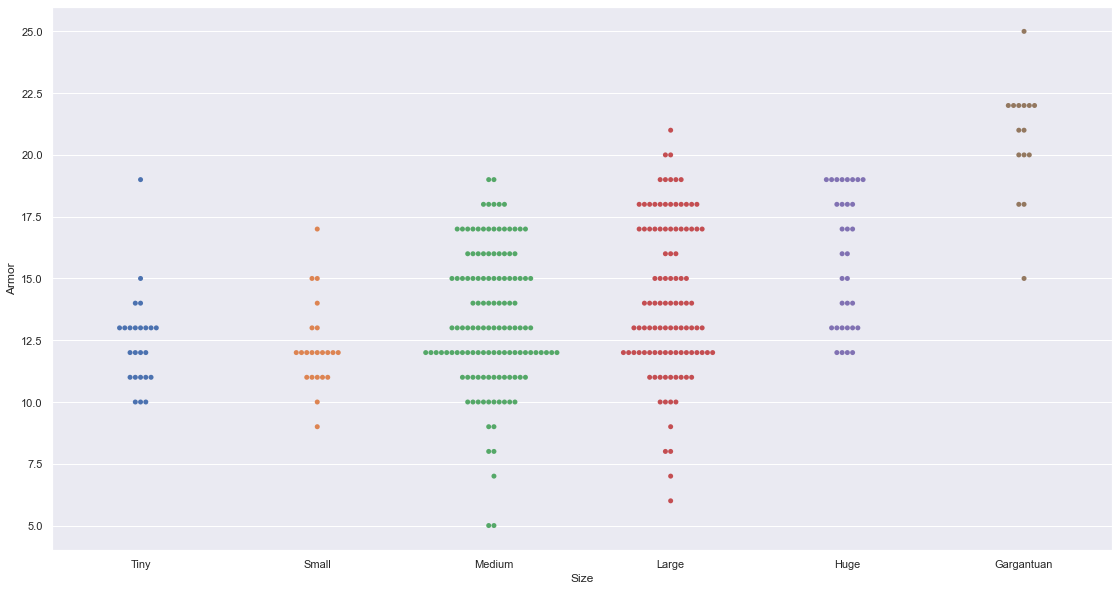

In [108]:
# Larger Monsters also tend to have higher Armor

sns.swarmplot(x=df["Size"], y=df["Armor"]);

<a class="anchor" id="plot2"></a>

## More Interesting Charts

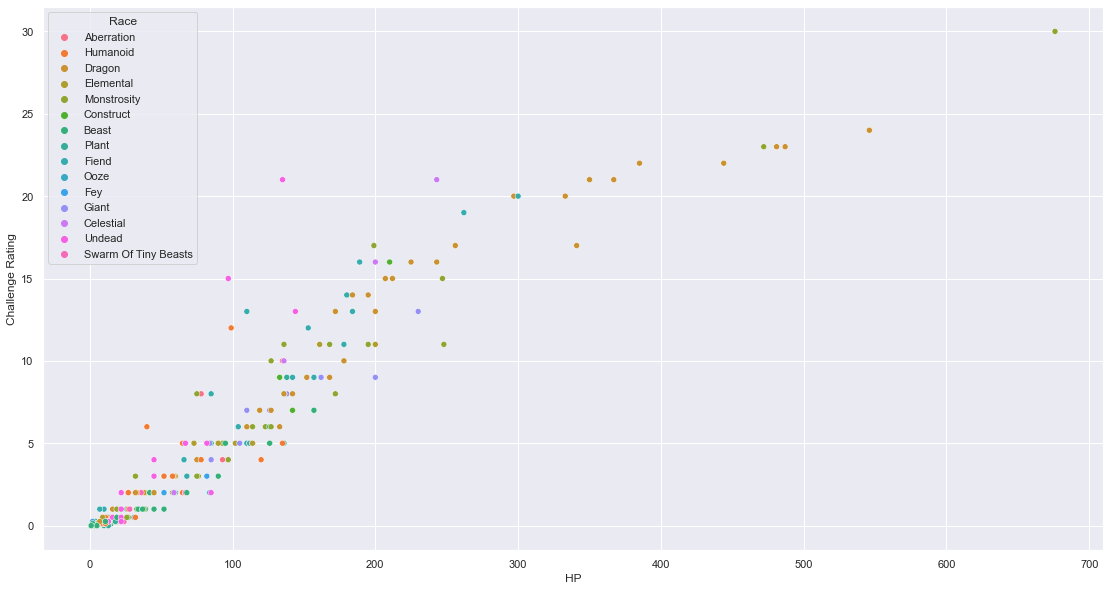

In [109]:
sns.scatterplot( data = df_race_nodummy, x="HP", y="Challenge Rating", 
                hue = "Race");

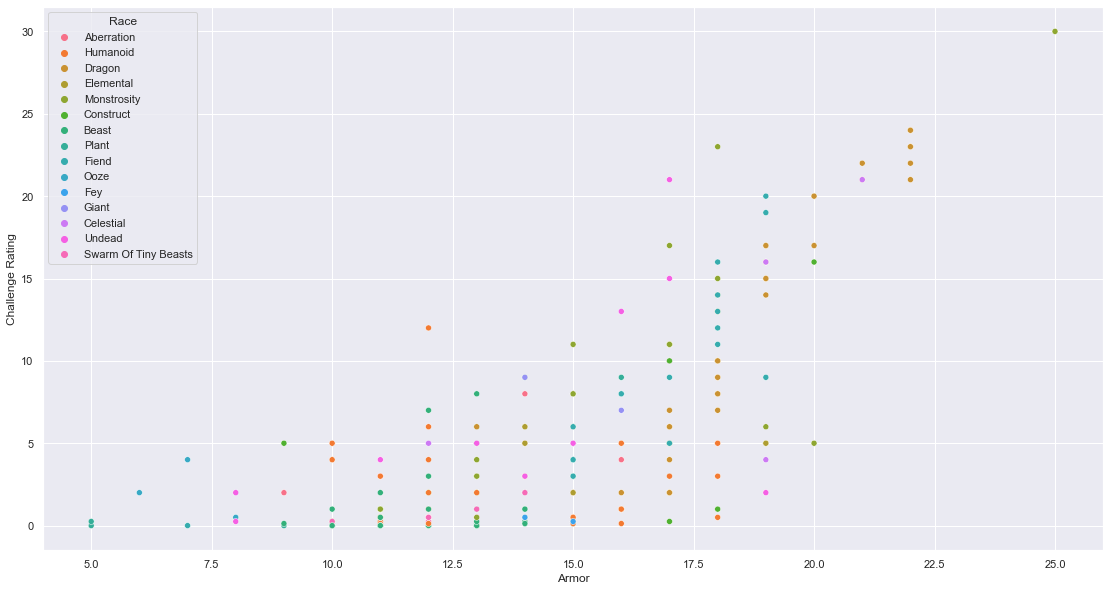

In [110]:
sns.scatterplot( data = df_race_nodummy, x="Armor", y="Challenge Rating", 
                hue = "Race");

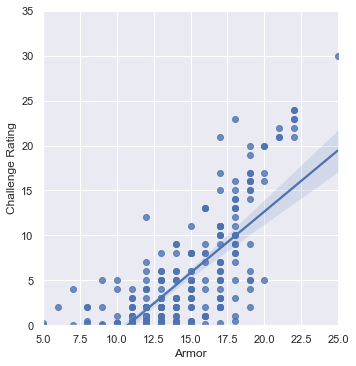

In [111]:
# Monsters with more Armor are usually more Challenging
g = sns.lmplot(data=df_race_nodummy, x="Armor", y="Challenge Rating", truncate=True,scatter=True)
g.set(ylim=(0,35));

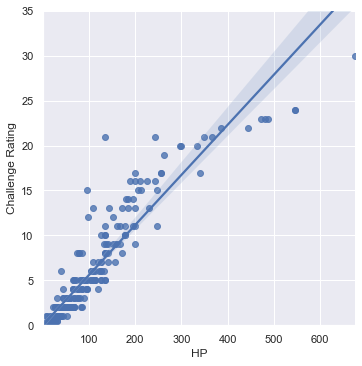

In [112]:
# Monsters with more HP are usually more Challenging 
g = sns.lmplot(data=df_race_nodummy, x="HP", y="Challenge Rating", truncate=True,scatter=True)
g.set(ylim=(0,35));

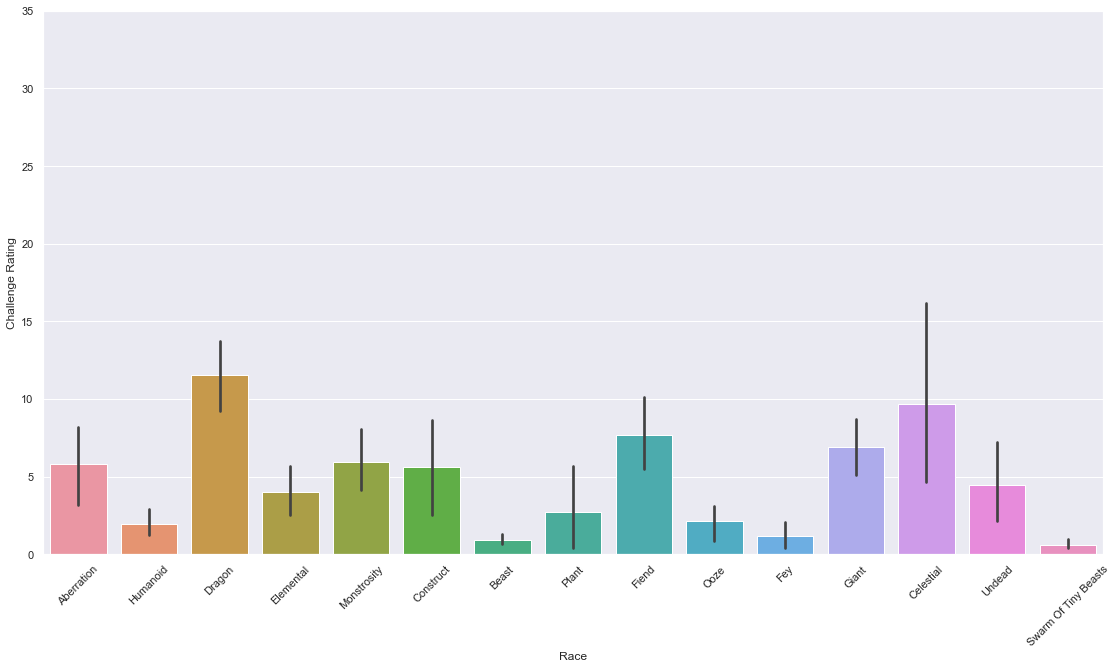

In [113]:
# Dragons have a higher than average Challenge Rating
g = sns.barplot(data=df_race_nodummy, x="Race", y="Challenge Rating")
plt.xticks(rotation=45)
g.set(ylim=(0,35));

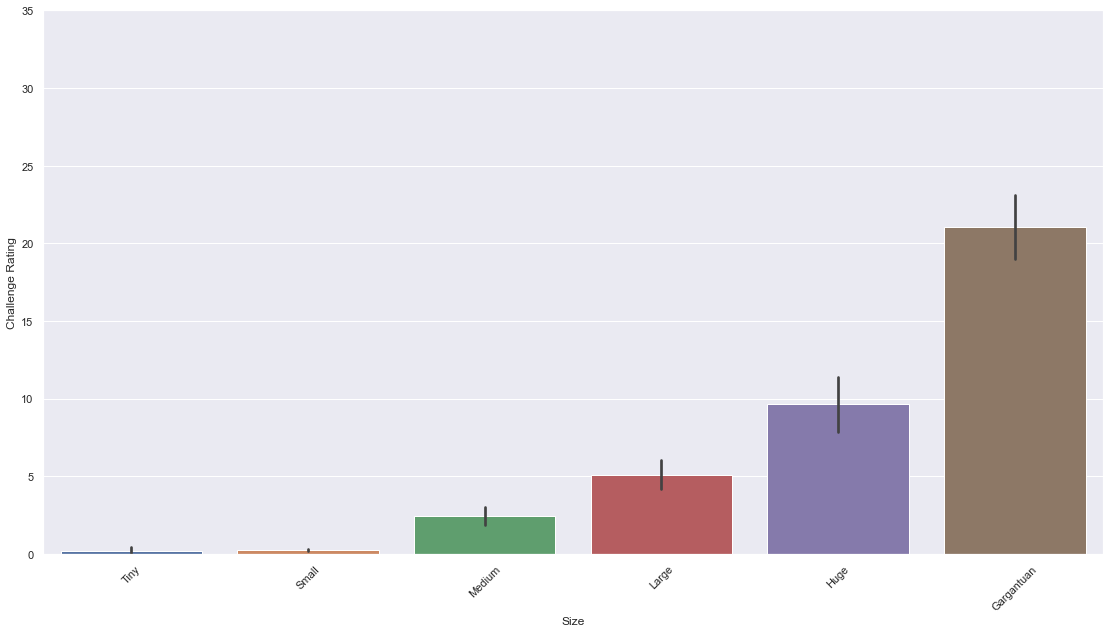

In [114]:
# Bar Plot shows a possitive correlation between Size and Challenge Rating
g = sns.barplot(data=df_race_nodummy, x="Size", y="Challenge Rating")
plt.xticks(rotation=45)
g.set(ylim=(0,35));

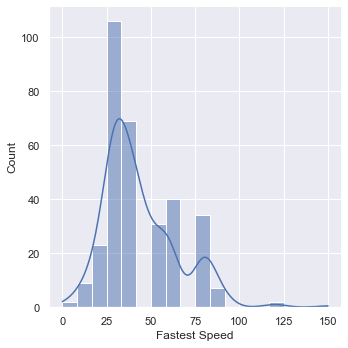

In [115]:
# Most monsters about 30-40 speed
g = sns.displot( x=df["Fastest Speed"], kde = True);

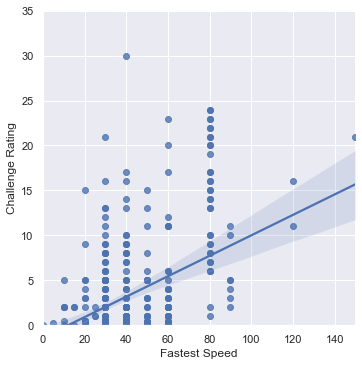

In [116]:
# Faster monsters are usually tougher
g = sns.lmplot(data=df_race_nodummy, x="Fastest Speed", y="Challenge Rating", truncate=True,scatter=True, robust=True)
g.set(ylim=(0,35));

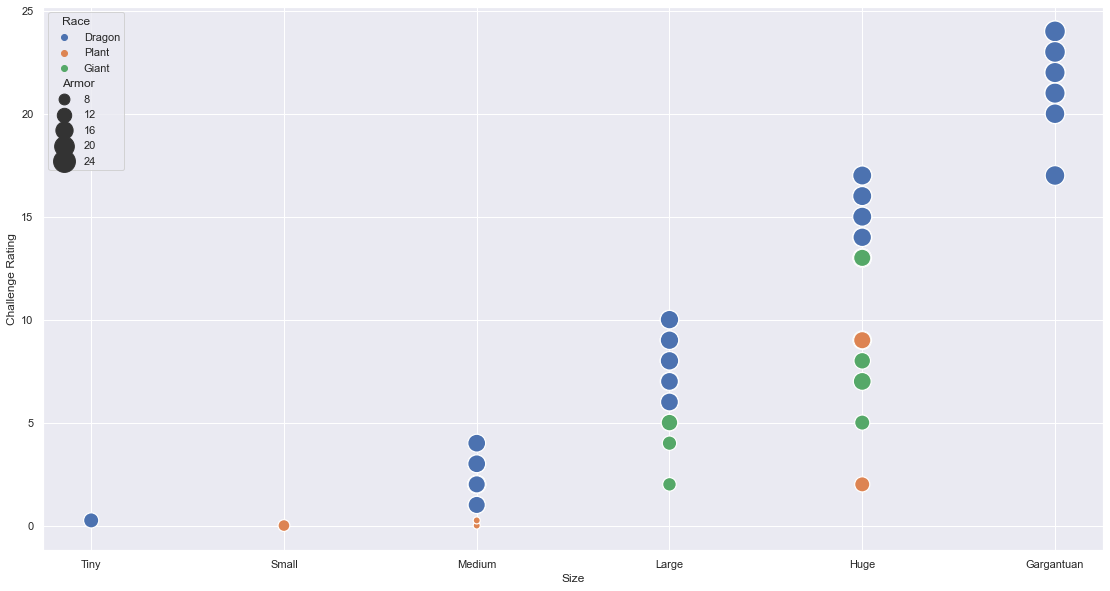

In [117]:
# We can add color to a Size/Challenge Rating scatter plot to see a third feature: "Race"

# It looks like most Dragons have Challenge Rating than Giants and Plants
# Plants have lower armor as well
# There is also one Tiny dragon in our dataset 

sns.scatterplot( x=df["Size"], y=df["Challenge Rating"], size = df["Armor"], sizes= (50,500),
                hue = df[df['Race'].isin([ 'Plant','Giant','Dragon'])]['Race']);


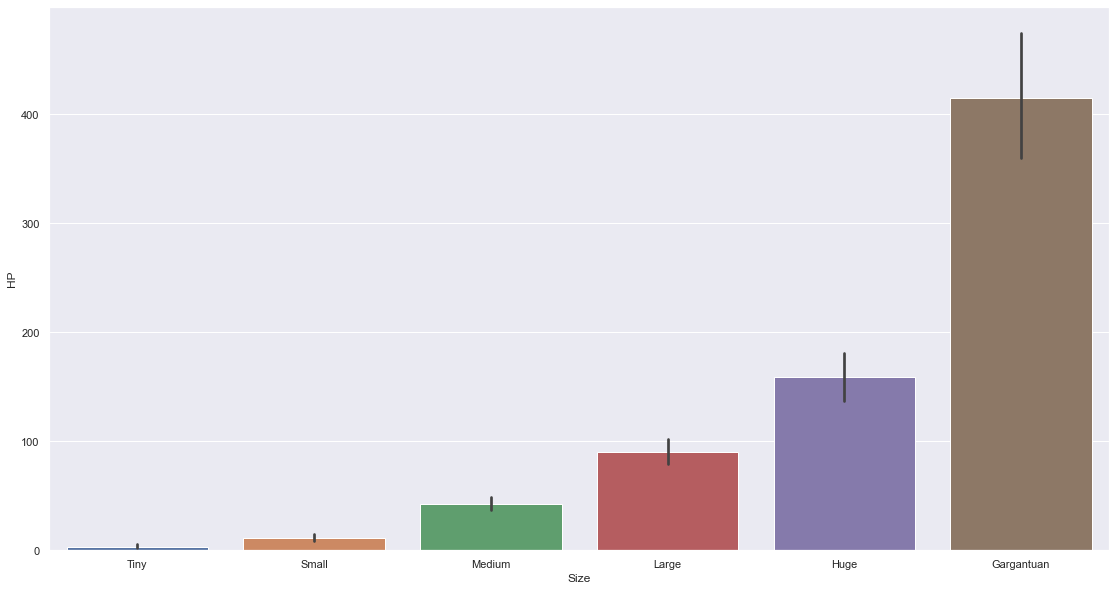

In [118]:
# Larger Monsters also tend to have higher HP

sns.barplot(x=df["Size"], y=df["HP"]);

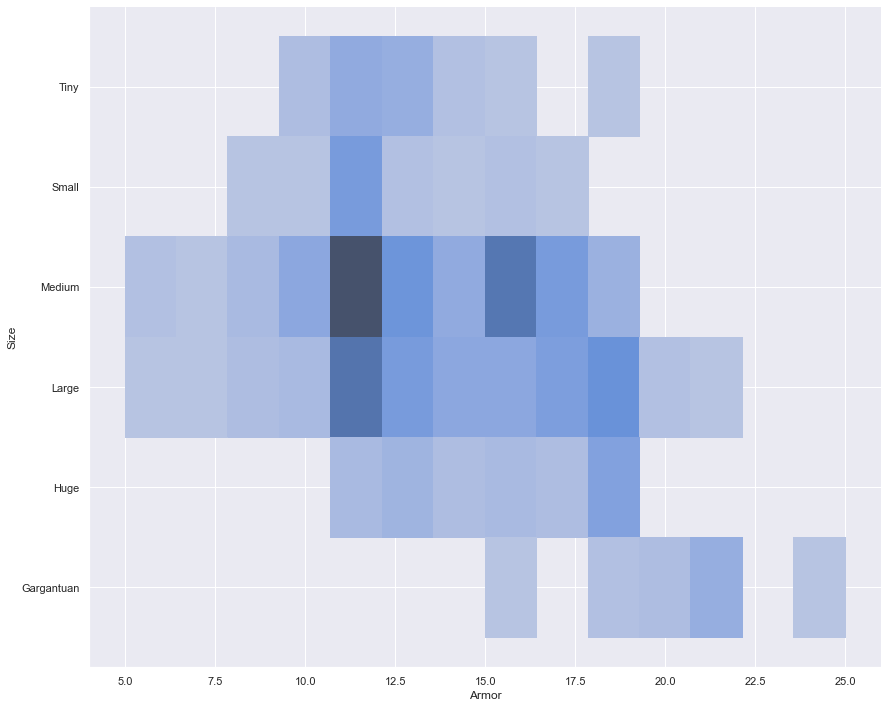

In [119]:
# On this displot we can see our most common Size & Armor combinations are:
# Large & 11-12
# Medium & 11-12
sns.set_style = "ticks"

sns.displot(x=df["Armor"], y=df["Size"], height= 10, aspect = 1.25);


In [120]:
# # The Kernel Density Estimate plot requires numeric or datetime data types 
# # We can map these ordinal categories to a new category and convert to integers


size_map = {
    "Tiny": 0,
    "Small": 1,
    "Medium": 2,
    "Large": 3,
    "Huge": 4,
    "Gargantuan": 5
}

df["Size_Numerical"] = df["Size"].map(size_map).cat.codes

df["Size_Numerical"].unique()


array([3, 2, 4, 5, 1, 0], dtype=int8)

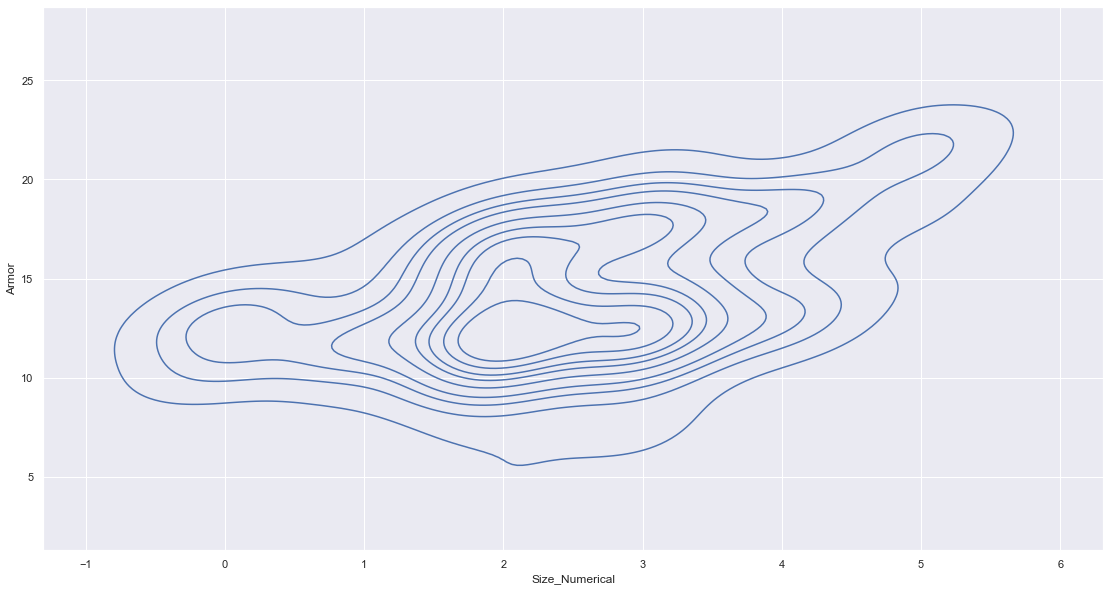

In [121]:
# On this kernel density plot we can see our densest regions of Size & Armor combinations:
# Large (3) & 11-12
# Medium (2) & 11-12
sns.kdeplot ( x=df["Size_Numerical"], y=df["Armor"]);